<a href="https://colab.research.google.com/github/itimes-digital/Bootcamp-Analista-de-Machine-Learning-IGTI/blob/master/classificar_roupas_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [55]:
print(tf.__version__)

2.3.0


In [56]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [57]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [58]:
train_images.shape

(60000, 28, 28)

In [59]:
len(train_labels)

60000

In [60]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [86]:
len(train_labels)

60000

In [61]:
test_images.shape

(10000, 28, 28)

In [62]:
len(test_labels)

10000

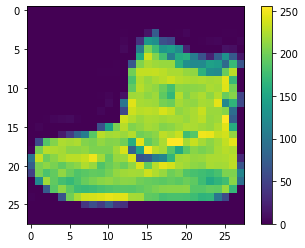

In [63]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

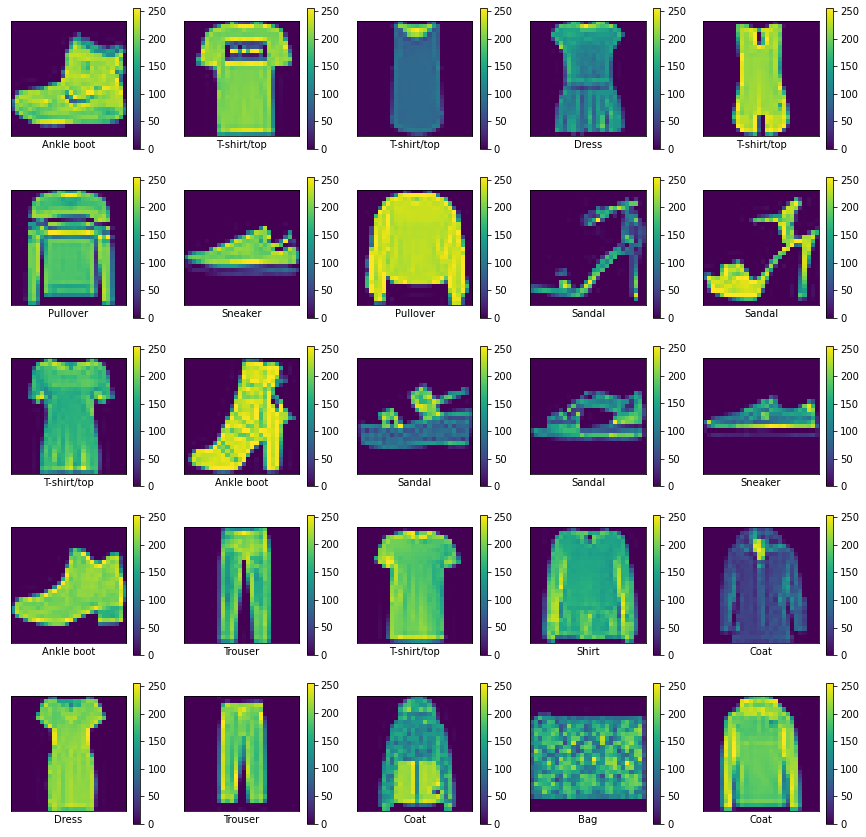

In [64]:
plt.figure(figsize=(15,15))

for i in range(25):
  plt.subplot(5,5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.colorbar()
  plt.xlabel(class_names[train_labels[i]])
  
plt.show()

In [65]:
train_images = train_images / 255.0
test_images = test_images / 255.0

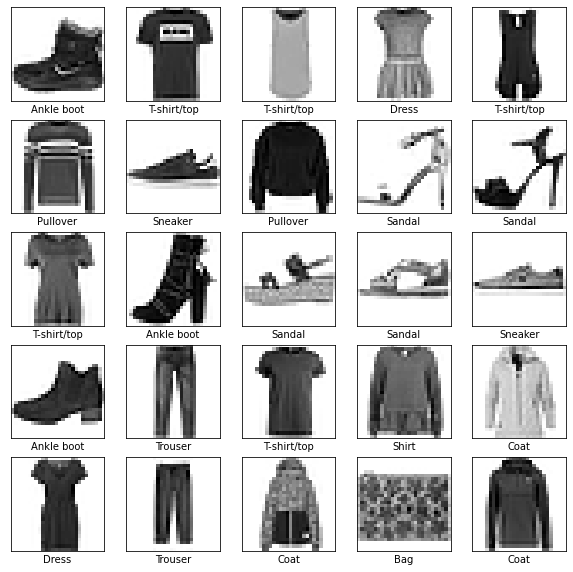

In [66]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)#mudando a escala de cor
  plt.xlabel(class_names[train_labels[i]])

plt.show()

In [67]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')
])

In [68]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [69]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4974 - accuracy: 0.8241
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3709 - accuracy: 0.8653
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3343 - accuracy: 0.8777
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3104 - accuracy: 0.8867
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2901 - accuracy: 0.8938
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2783 - accuracy: 0.8972
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2641 - accuracy: 0.9022
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2537 - accuracy: 0.9055
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2450 - accuracy: 0.9096
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.238

In [70]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)

313/313 - 0s - loss: 0.3400 - accuracy: 0.8791


In [87]:
len(test_images)

10000

In [71]:
predictions = model.predict(test_images)

In [72]:
predictions[0]

array([3.7502531e-07, 2.6525912e-10, 5.0402718e-08, 1.4268292e-09,
       7.7685858e-09, 5.8787380e-04, 6.1830394e-07, 6.3426532e-02,
       1.6045041e-07, 9.3598443e-01], dtype=float32)

In [73]:
np.argmax(predictions[0])

9

In [74]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
                                       color=color)

In [75]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='#777777')
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

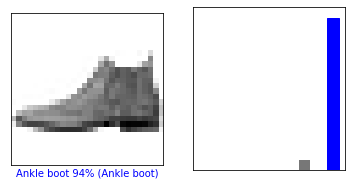

In [76]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

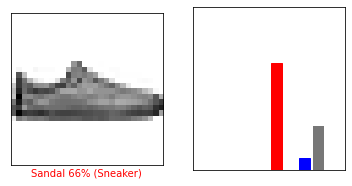

In [77]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

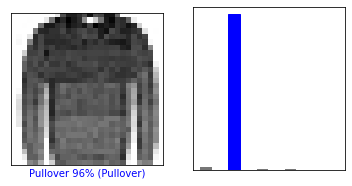

In [78]:
i = 20
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

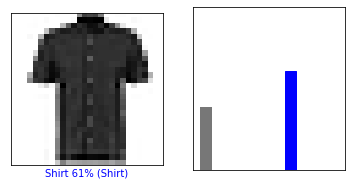

In [79]:
i = 40
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

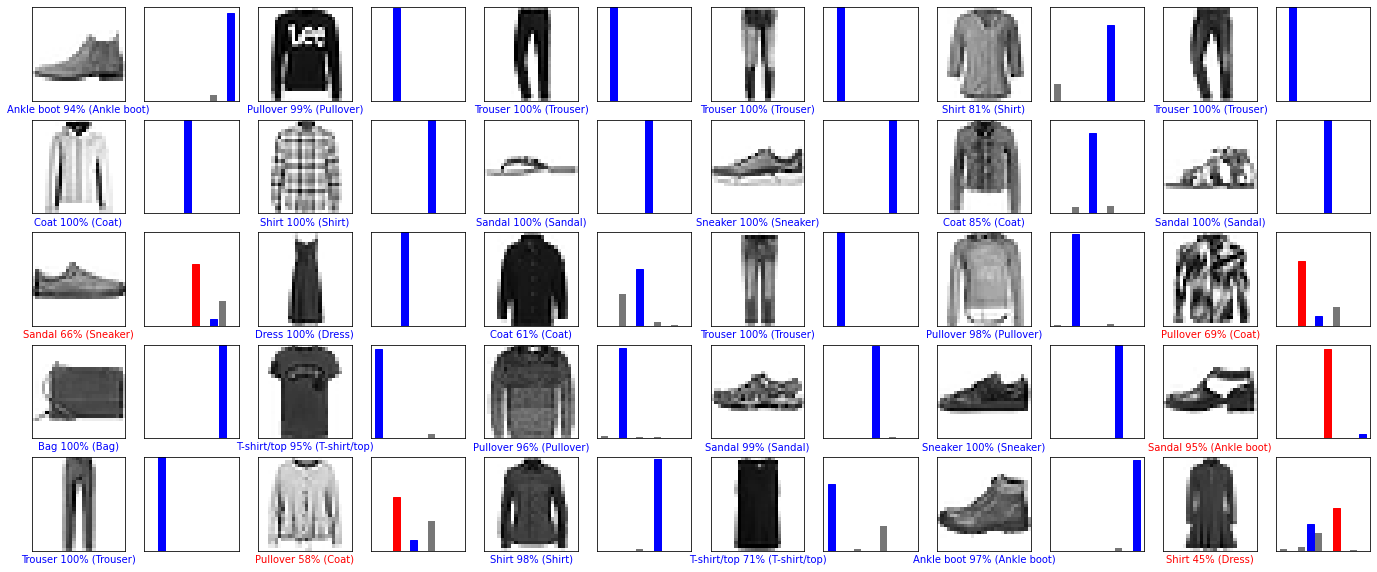

In [80]:
num_rows = 5
num_cols = 6
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
  plot_value_array(i, predictions, test_labels)

plt.show()

In [81]:
img = test_images[0]
print(img.shape)

(28, 28)


In [82]:
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [83]:
predictions_single = model.predict(img)
print(predictions_single)

[[3.7502537e-07 2.6525918e-10 5.0402530e-08 1.4268240e-09 7.7685565e-09
  5.8787304e-04 6.1830463e-07 6.3426383e-02 1.6044999e-07 9.3598455e-01]]


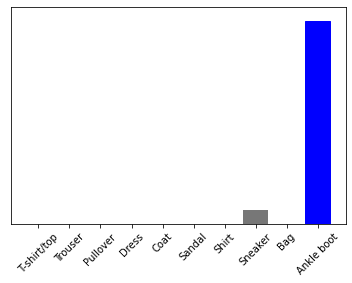

In [84]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [85]:
np.argmax(predictions_single[0])

9